# <center>异质性代理人宏观经济学的计算方法</center>
    Alisdair McKay,    https://alisdairmckay.com/Notes/HetAgents/index.html
    笔记：许文立，SFU/AHU/CIMERS/国民经济工程实验室（北京）
    
    目录
    
    RBC模型回顾
    
    内生栅格法（Endogenous Grid Method）
    
    生产经济的静态均衡
    
    完美预期转移动态
    
    Reiter法的经济周期
    
    异质性代理人新凯恩主义模型（HANK）
    
    算法细节
    
## 1 概述
    这份讲稿旨在讲解异质性代理人宏观模型的解得方法。我们会从解一个代表性代理人RBC模型开始，然后转向一个消费-储蓄问题来引入内生栅格法，并为异质性代理人模型做准备。虽然，我们解Aiyagari（1994）模型的静态均衡。尽管仍存在异质性冲击，但没有总体冲击，因此，它只是确定性稳态。在这种情形下，我们讨论非随机模拟技术。因此，将完美预期转移动态加入这类模型就比较直观了。接下来，我们会讨论将总体冲击加入异质性代理人模型带来的方法论挑战。可能异质性代理人模型最为人熟知的方法是Krusell-Smith（1997）算法。本讲稿介绍Reiter（2009）方法，这种方法利用扰动技术来近似静态均衡附近的动态。该方法的优势是并不需要进行模拟，当我们需要找到市场出清价格作为模拟的一部分式，模拟过程会非常耗时。但是这种方法的劣势是动态是一种线性、局部近似，因此，并不能刻画高阶动态，例如面对总的冲击的预防性储蓄动机（与线性化代表性代理人模型类似）。最后，我们将Reiter法应用到HANK模型。
    
    这是一个理论性讲稿，并没有涉及太多代码的讲解。

## 2 RBC模型回顾
    在一个RBC模型中，家庭的偏好为：
  
$$\mathbb{E}_{0} \sum_{t=0}^{\infty} \beta^{t} \frac{C_{t}^{1-\gamma}}{1-\gamma}$$

    生产函数为
$$Y_{t}=Z_{t} K_{t-1}^{\alpha} \bar{L}^{1-\alpha}$$

    资本演化方程：
$$
K_{t}=(1-\delta) K_{t-1}+Y_{t}-C_{t}
$$

    生产率冲击
$$
\log Z_{t}=\rho \log Z_{t-1}+\varepsilon_{t}
$$
其中， $\varepsilon$独立同分布、均值为0的扰动项。 我采用非传统时间——在$t$期选择资本存量的时间点，但在生产中却使用$t+1$作为资本$K_{t}$，使得 $t$期的资本相对于$t$期的信息来说是可测度的。 

那么，该模型就可以使用下列的期望差分方程来表示：

$$
\begin{aligned}
C_{t}^{-\gamma} &=\beta \mathbb{E}_{t}\left[R_{t+1} C_{t+1}^{-\gamma}\right] \\
R_{t} &=\alpha Z_{t}\left(K_{t-1} / \bar{L}\right)^{\alpha-1}+1-\delta \\
K_{t} &=(1-\delta) K_{t-1}+Y_{t}-C_{t} \\
Y_{t} &=Z_{t} K_{t-1}^{\alpha} \bar{L}^{1-\alpha} \\
\log Z_{t} &=\rho \log Z_{t-1}+\varepsilon_{t}
\end{aligned}
$$

   随机过程$X_{t} \equiv\left(C_{t}, R_{t}, K_{t}, Y_{t}, Z_{t}\right)$未知的。我们将会在确定性稳态附近对模型进行线性化，然后解出模型经济的动态 我们估计劳动的稳态$\bar{L}=1$ ，然后计算出其他变量的稳态：

$$
\begin{array}{l}
Z=1 \\
R=1 / \beta \\
K=\left(\frac{R-1+\delta}{\alpha}\right)^{1 /(\alpha-1)} \\
Y=K^{\alpha} \\
C=Y-\delta K
\end{array}
$$
    
    我们可以线性化上述模型，得到下列形式：
$$
A \mathbb{E}_{t} X_{t+1}+B X_{t}+C X_{t-1}+\mathcal{E} \epsilon_{t}=0
$$
其中，$A, B, C,$和$\mathcal{E}$ 系数矩阵，$\epsilon_{t}$ 时期$t$的冲击向量。

### 2.1 解线性模型

有许多方法可以解线性理性预期模型。Rendahl
(2017) [1]提出了一种方法，使用猜测-验证法来得到形式为 $X_{t}=P X_{t-1}+Q \epsilon_{t}$的解，其中， $P$ 和 $Q$是我们要求出的系数矩阵。将上述解带入线性化模型：
$$
\begin{aligned}
A \mathbb{E}_{t}\left[P X_{t}+Q \epsilon_{t+1}\right]+B X_{t}+C X_{t-1}+\mathcal{E} \epsilon_{t} &=0 \\
A \mathbb{E}_{t}\left[P\left(P X_{t-1}+Q \epsilon_{t}\right)+Q \epsilon_{t+1}\right]+B\left(P X_{t-1}+Q \epsilon_{t}\right)+C X_{t-1}+\mathcal{E} \epsilon_{t} &=0 \\
\left[A P^{2}+B P+C\right] X_{t-1}+[A P Q+B Q+\mathcal{E}] \epsilon_{t} &=0
\end{aligned}
$$
$\epsilon_{t+1}$没有出现在线性模型中，是因为$A Q \mathbb{E}_{t} \epsilon_{t+1}=0$。因此，经济面临的风险分布并不会影响解，这个性质被称为“确定性等价”。我们寻找$P$和$Q$ 的值，进而进出模型中所有变量 $X_{t-1}$ 的$\epsilon_{t}$的值，这就意味着方括号里的表达式必须为0。 Rendahl的方法就是找到$A P^{2}+B P+C=0$的一个解，并从初始猜测值$P^{(0)}$开始迭代。这种方法假设在$t+1$期会使用$P^{(0)}$ ，并解出$P^{(1)}$：
$$
\begin{aligned}
A P^{(n)} P^{(n+1)}+B P^{(n+1)}+C &=0 \\
P^{(n+1)} &=-\left[A P^{(n)}+B\right]^{-1} C .
\end{aligned}
$$

    我们重复这个过程，直到得到解$P^{(n+1)}$使得$A P^{2}+B P+C=0$满足一定的精度。利用得到的解$P$，我们就可以解出$Q$： 
$$
\begin{aligned}
A P Q+B Q+\mathcal{E} &=0 \\
Q &=-[A P+B]^{-1} \mathcal{E} .
\end{aligned}
$$
    
    利用得到的解P和Q，我们可以画出脉冲响应函数，模拟经济周期，并计算经济的二阶矩性质。
    
### 2.2 线性化模型

    在上述例子中，我们很容易线性化模型，但是在后面的应用中，由于模型方程较多，手动线性化可能比较难。我们可以利用自动微分技术来依靠计算机来计算导数。这是因为计算机知道如何微分基本的数学运算，然后用链式法则来得到结果。这就意味着自动微分可以通过计算机代码来实现——作为基本数学运算，而不是迭代得到一种解得算法。自动微分也有Matlab和Python的包：
    Matlab自动微分包:https://github.com/sehyoun/MATLABAutoDiffhttps://github.com/sehyoun/MATLABAutoDiff
    Python自动微分：https://github.com/HIPS/autogradhttps://github.com/HIPS/autograd
实践中，我们会将一个函数写成：$F\left(X_{t-1}, X_{t}, X_{t+1}, \epsilon_{t}\right)=0$，其给出五个模型方程的余值。然后，我们使用自动微分来对函数在稳态出进行微分求解。
    
Footnotes

[1]	Rendahl, Pontus. “Linear Time Iteration.” (2017).
Footnotes

## 3 内生栅格法
考虑一个消费者，其收入e会波动，且服从一个转移概率为$\Pi\left(e^{\prime} \mid e\right)$$\Pi\left(e^{\prime} \mid e\right)$的马尔科夫链，上标‘表示变量的下一期的值。为了简化，假设e取两个值。消费者可以以回报R来持有无风险债券（储蓄的一种形式）。因此，预算约束为：
$$a^{\prime}+c=R a+e$$
其中，a是付息资产。假设存在借贷约束$a^{\prime} \geq 0$。消费者希望最大化效用函数：
$$
\mathbb{E}_{0} \sum_{t=0}^{\infty} \beta^{t} \frac{c_{t}^{1-\gamma}}{1-\gamma}
$$

    消费者问题的状态变量为（a,e），因此，这个问题的解可以表述为一个函数g(a,e)给出$a'$的选择。
    
    我们用欧拉方程解消费者问题：
$$
c^{-\gamma}=\beta R \mathbb{E}\left[c^{-\gamma}\right]
$$

其中，基于$e'$的值取期望。给定储蓄政策规则，我们可以使用预算约束来找到消费函数：
\begin{equation}
c(a, e)=R a+e-g(a, e)
\end{equation}

内生栅格法的核心如下。假设当期，经济状态(a,e)，且e已知，但是还不知道a。假设我们储蓄一定的数量A，因此，$g(a, e)=A$，接下来，我们就能确定a。那么，欧拉方程可以写成：
\begin{equation}
c(a, e)^{-\gamma}=\beta R \mathbb{E}_{e^{\prime}}\left[R A+e^{\prime}-g\left(A, e^{\prime}\right)^{-\gamma}\right]
\end{equation}

我们猜测一个政策函数g，然后计算等号右边，解这个方程，得到$c(a,e)$。接下来，我们使用预算约束来解a：
$$
a=\frac{1}{R}[c(a, e)+A-e]
$$

现在我们有一个新的政策规则来将(a,e)映射到A。我们用这个新的政策规则作为政策函数g(a,e)的新的猜测形式，然后重复这些步骤直到算法收敛——g的猜测不断的产生出一个相近的函数，相近意味着差异非常小。

### 3.1 实施这个方法

现在，我们来讨论如何实施这个方法。

#### 3.1.1 近似决策规则
计算机里是不能呈现函数的，因此，首先，我们要决定如何近似储蓄规则。我们以某种反直觉的方式来简化这个问题。该方式假设当没有借贷约束时，政策规则是a的严格增函数。

将a’划分成$N_A$个点，起点是借贷约束，在上例中就是0，假设A是其中一个栅格点。定义G是$N_A \times 2$矩阵，每一列都是长度$N_A$的严格递增向量，将政策规则表示成a的一个函数，对于一个给定的e的值。我们可以将其解释成，如果已经有了经济状态$(G_{i,j},e_j)$，那么，政策规则就会用到储蓄$A_i$。针对介于$G_{i,j}$和$G_{i+1,j}$之间的a值，我们将会使用线性插值来补齐函数。

下图画出了我们的函数近似过程。栅格A放在纵轴，近似函数而选择的G的值放在横轴。

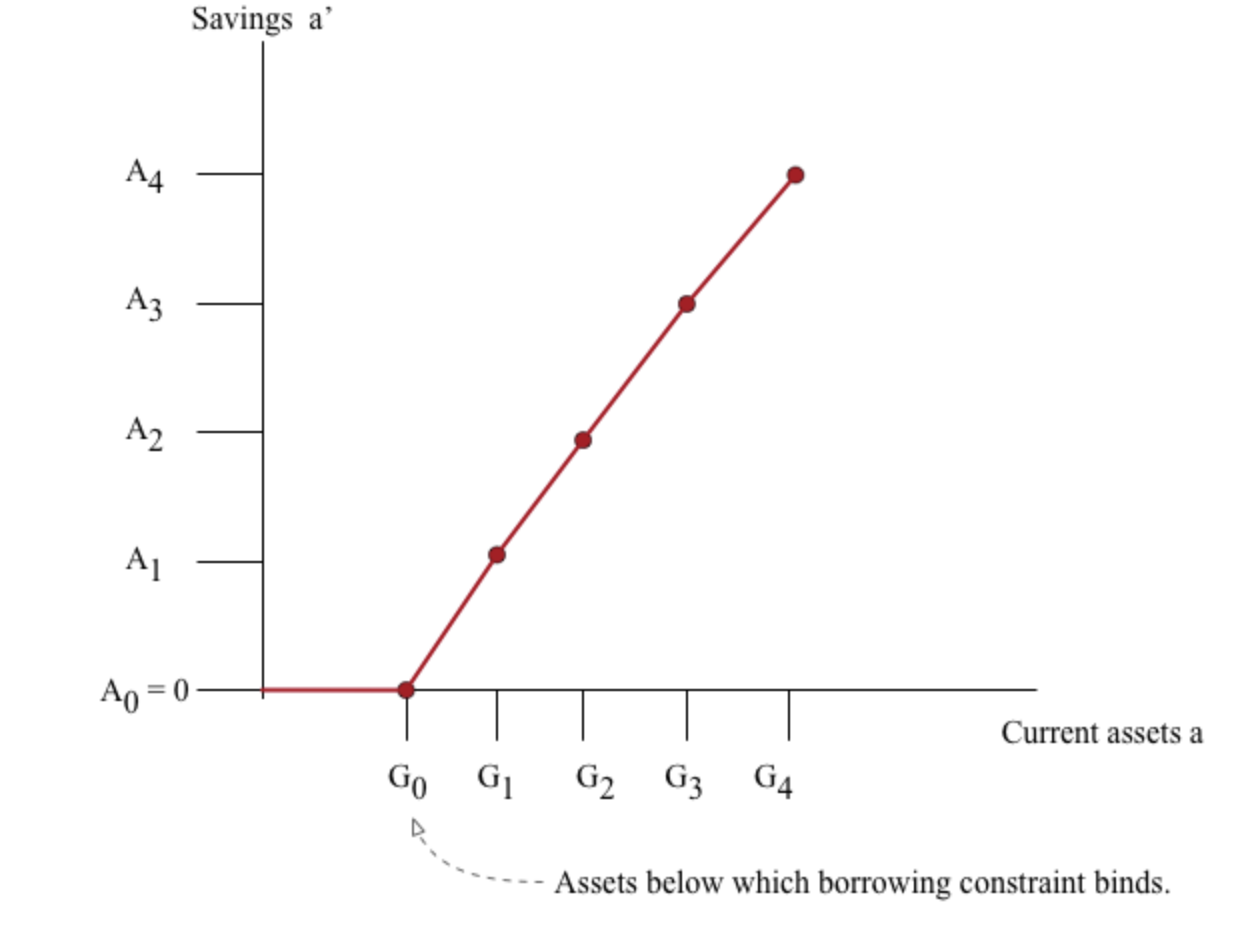

#### 3.1.2 投影法的解释

内生栅格法作为一种迭代算法来使用
